In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
df = pd.read_csv('../outputs/aggregated.csv')

In [5]:
# make normalizations
df['I(X_1->X_2)/H(X_2)'] = df['I(X_1->X_2)'] / df['H(X_2)']
df['I(X_1->X_2)/d_1'] = df['I(X_1->X_2)'] / df['d_1']
df['I(X_1->X_2)/d_2'] = df['I(X_1->X_2)'] / df['d_2']

In [16]:
df

,id,Unnamed: 0,I(X_1->X_2),H(X_2),H(X_2|X_1),id.1,date,model_1,model_2,d_1,...,ff_residual_connection,ff_activation,ff_layer_norm,ff_layers,I(X_1 -> X_2) / H(X_2),I(X_1 -> X_2),I(X_1 -> X_2) / dim,I(X_1->X_2)/H(X_2),I(X_1->X_2)/d_1,I(X_1->X_2)/d_2
0,a8d8db4a-4572-47b2-a250-22cfed6fff81,0,7.841511,-72.365706,-80.207217,a8d8db4a-4572-47b2-a250-22cfed6fff81,2024-03-08 06:35:01,jamesgpt1/sf_model_e5,sentence-transformers/all-mpnet-base-v2,1024,...,False,relu,True,2,7.841511,7.841511,0.007658,-0.108359,0.007658,0.007658
1,6a048a2e-a707-4663-993e-003cbe6db087,0,NaN,221370.222269,NaN,6a048a2e-a707-4663-993e-003cbe6db087,2024-03-08 06:28:57,izhx/udever-bloom-560m,thenlper/gte-large,1024,...,False,relu,True,2,NaN,NaN,NaN,NaN,NaN,NaN
2,04e8be3a-c0b2-423f-8dbe-2babf860cdd8,0,NaN,221369.399546,NaN,04e8be3a-c0b2-423f-8dbe-2babf860cdd8,2024-03-08 06:29:48,izhx/udever-bloom-560m,sentence-transformers/gtr-t5-large,1024,...,False,relu,True,2,NaN,NaN,NaN,NaN,NaN,NaN
3,29ae75ee-2928-40f2-912f-73639685bc85,0,5.693573,-24.564264,-30.257837,29ae75ee-2928-40f2-912f-73639685bc85,2024-03-08 03:39:35,intfloat/multilingual-e5-small,thenlper/gte-large,384,...,False,relu,True,2,5.693573,5.693573,0.014827,-0.231783,0.014827,0.014827
4,0d9b24dd-1289-4474-ae4b-da27233c240b,0,718.914153,669.246710,-49.667444,0d9b24dd-1289-4474-ae4b-da27233c240b,2024-03-08 04:35:27,sentence-transformers/allenai-specter,sentence-transformers/allenai-specter,768,...,False,relu,True,2,718.914153,718.914153,0.936086,1.074214,0.936086,0.936086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,20d1c1d0-fea7-4901-a9a1-793aaa543b6d,0,8.132526,-52.814947,-60.947473,20d1c1d0-fea7-4901-a9a1-793aaa543b6d,2024-03-08 04:10:11,sentence-transformers/sentence-t5-large,infgrad/stella-base-en-v2,768,...,False,relu,True,2,8.132526,8.132526,0.010589,-0.153982,0.010589,0.010589
837,fa7616c8-c4d4-48f3-9e9b-51f3ae87f07c,0,192.024429,161.354151,-30.670278,fa7616c8-c4d4-48f3-9e9b-51f3ae87f07c,2024-03-08 05:52:24,sentence-transformers/msmarco-bert-co-condensor,izhx/udever-bloom-560m,768,...,False,relu,True,2,192.024429,192.024429,0.250032,1.190081,0.250032,0.250032
838,c3a72791-a5de-437f-a776-0706e935a93e,0,8.087239,-52.820260,-60.907499,c3a72791-a5de-437f-a776-0706e935a93e,2024-03-08 04:01:31,sentence-transformers/sentence-t5-xl,princeton-nlp/sup-simcse-bert-base-uncased,768,...,False,relu,True,2,8.087239,8.087239,0.010530,-0.153109,0.010530,0.010530
839,1271ce72-20f2-4bac-9ff7-ebeddeaae350,0,10.098705,-48.438653,-58.537358,1271ce72-20f2-4bac-9ff7-ebeddeaae350,2024-03-08 02:34:07,infgrad/stella-base-en-v2,avsolatorio/GIST-Embedding-v0,768,...,False,relu,True,2,10.098705,10.098705,0.013149,-0.208484,0.013149,0.013149


<Axes: xlabel='I(X_1->X_2)/d_2', ylabel='Count'>

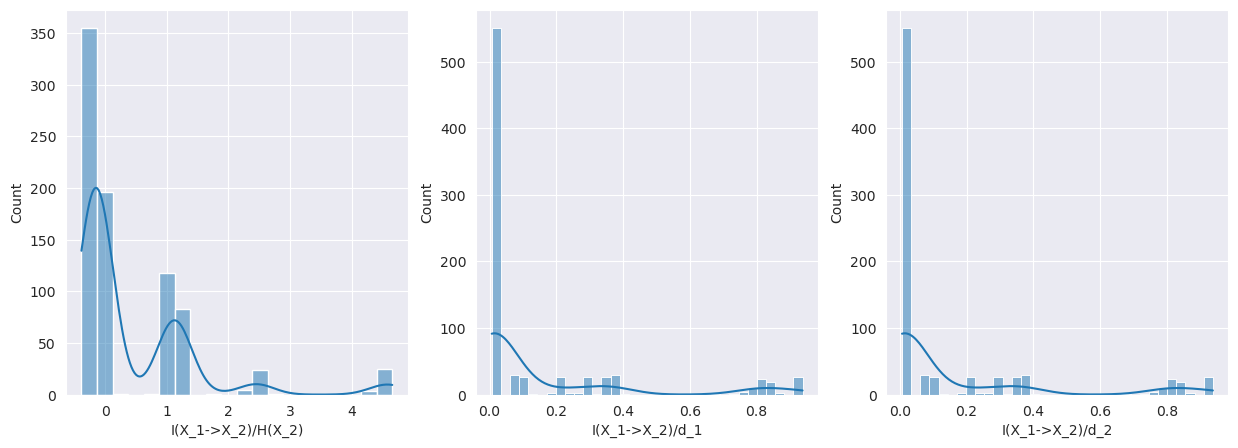

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['I(X_1->X_2)/H(X_2)'], kde=True, ax=ax[0])
sns.histplot(df['I(X_1->X_2)/d_1'], kde=True, ax=ax[1])
sns.histplot(df['I(X_1->X_2)/d_2'], kde=True, ax=ax[2])

<Axes: xlabel='I(X_1->X_2)/d_2', ylabel='Count'>

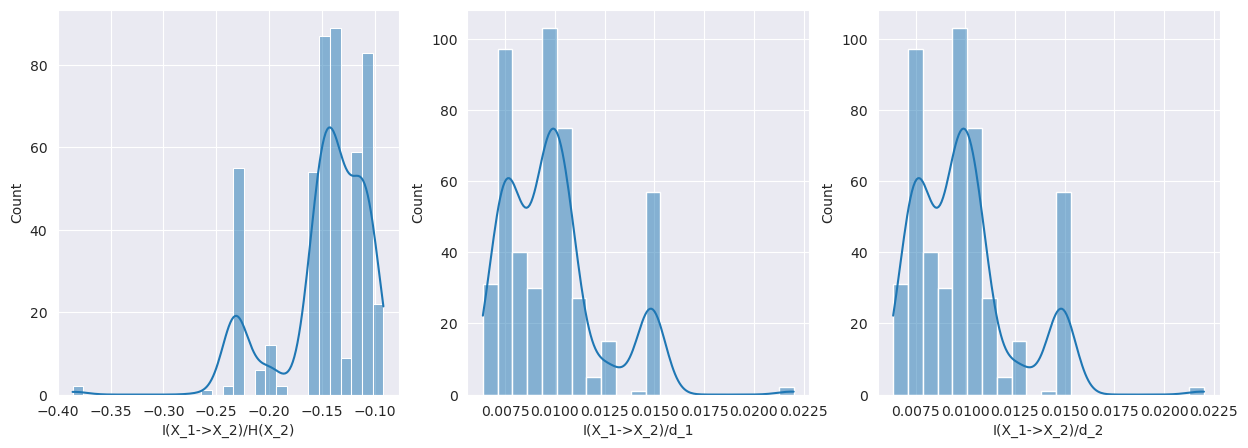

In [9]:
# keep close to 0 mutual information
toplt = df[df['I(X_1->X_2)'] <= 10]
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(toplt['I(X_1->X_2)/H(X_2)'], kde=True, ax=ax[0])
sns.histplot(toplt['I(X_1->X_2)/d_1'], kde=True, ax=ax[1])
sns.histplot(toplt['I(X_1->X_2)/d_2'], kde=True, ax=ax[2])


/tmp/ipykernel_185672/3818438942.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = table[["model_1", "model_2",metric]].pivot("model_1", "model_2", metric).fillna(-0.0)
/usr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_185672/3818438942.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  table = table[["model_1", "model_2",metric]].pivot("model_1", "model_2", metric).fillna(-0.0)
/usr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/lib/python3.11/site-packages/numpy/core/_methods.py:129: 

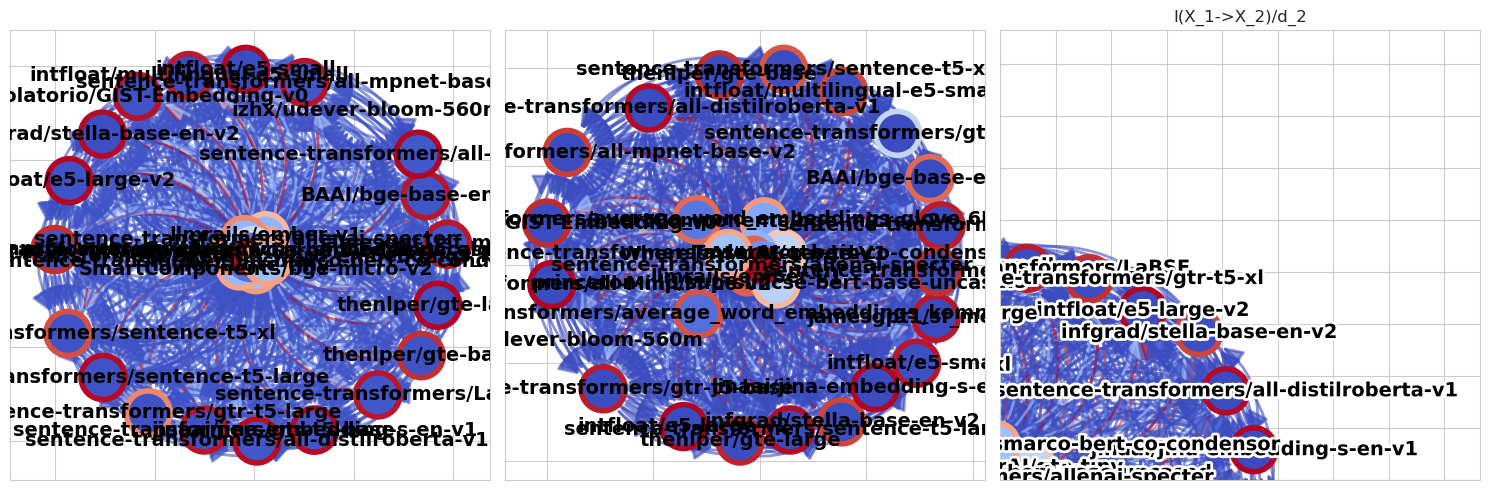

In [15]:
dedup = df.groupby(['model_1', 'model_2']).first().reset_index()
sns.set_style("whitegrid")

from matplotlib import patheffects

def plot_mi_graph(df, metric, ax):
    cmap =sns.color_palette("coolwarm", as_cmap=True)


    table = dedup
    table = table[["model_1", "model_2",metric]].pivot("model_1", "model_2", metric).fillna(-0.0)

    # remove lines and columns containing xsum in index and columns

    # compute 1/x for each value

    G= nx.from_pandas_adjacency(table, create_using=nx.DiGraph)
    G.remove_edges_from(nx.selfloop_edges(G))


    avg_weight = {n : np.mean([d[2]['weight'] for d in G.out_edges(n, data=True)]) for n in G.nodes()}
    avg_income = {n : np.mean([d[2]['weight'] for d in G.in_edges(n, data=True)]) for n in G.nodes()}
    # remove edge with weighht <= 50
    # for edge in list(G.edges(data=True)):
    #     if edge[2]['weight'] >= 1/55:
    #         G.remove_edge(edge[0], edge[1])


    layout = nx.spring_layout(G, k=2, iterations=100)

    def make_border_color(strength, cmap, vmin, vmax):
        return cmap((strength - vmin) / (vmax - vmin))
        

    # draw nodes with border color based on avg_income
    nx.draw_networkx_nodes(G, layout, node_size=1000, node_color=list(avg_weight.values()), cmap=cmap, vmin=min(avg_weight.values()), vmax=max(avg_weight.values()), ax=ax, linewidths=4, edgecolors=[make_border_color(avg_income[n], cmap, min(avg_income.values()), max(avg_income.values())) for n in G.nodes()])


    nx.draw_networkx_edges(G, layout, width=2, alpha=0.6, edge_color=[d[2]['weight'] for d in G.edges(data=True)], edge_cmap=cmap, edge_vmin=min(avg_weight.values()), edge_vmax=max(avg_weight.values()), ax=ax, arrowsize=30, arrowstyle='-|>', connectionstyle='arc3, rad = 0.4', min_source_margin=20, min_target_margin=20)

    nx.draw_networkx_labels(G, layout, font_size=14, font_color='black', font_weight='bold', ax=ax)


    # add white contour to all texts in the figure
    for text in plt.gca().texts:
        text.set_path_effects([patheffects.Stroke(linewidth=4, foreground='white'), patheffects.Normal()])
        
    plt.tight_layout()
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.tight_layout()
    # add title
    plt.title(f"{metric}")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
plot_mi_graph(dedup, 'I(X_1->X_2)/H(X_2)', ax[0])
plot_mi_graph(dedup, 'I(X_1->X_2)/d_1', ax[1])
plot_mi_graph(dedup, 'I(X_1->X_2)/d_2', ax[2])